### Sign Language Digits Model Behaviour

#### Importing Necessary Imports

In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical

#### Utils

In [3]:
# function to save figures
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    PATH = os.getcwd()
    IMAGES_PATH = PATH + '/images'
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    return

#### Converting Image Data to Numpy Arrays

In [7]:
# converting images to numpy arrays 

from matplotlib.pyplot import imread
from skimage.transform import resize
img_size = 64
grayscale_images = True
num_class = 10
test_size = 0.2

# function to read individual images 
def get_img(data_path):
    img = imread(data_path)
    img = resize(img, (img_size, img_size, 1 if grayscale_images else 3))
    return img

# make sure path pints to the dataset containing 0-9 folders
def get_dataset(dataset_path='dataset'):
    try:
        X = np.load('npy_dataset/X.npy')
        Y = np.load('npy_dataset/Y.npy')
        X_test = np.load('npy_dataset/X_test.npy')
        Y_test = np.load('npy_dataset/Y_test.npy')
    except:
        labels = ['0','1','2','3','4','5','6','7','8','9']
        X = []
        Y = []
        X_test = []
        Y_test = []
        for i, label in enumerate(labels):
            datas_path = dataset_path+'/'+label
            var = 15
            for data in os.listdir(datas_path):
                img = get_img(datas_path+'/'+data)
                if(var==0):
                    X.append(img)
                    Y.append(i)
                else:
                    X_test.append(img)
                    Y_test.append(i)
                    var= var-1

        X = np.array(X).astype('float32')
        Y = np.array(Y).astype('float32')
        Y = to_categorical(Y, num_class)
        X_test = np.array(X_test).astype('float32')
        Y_test = np.array(Y_test).astype('float32')
        Y_test = to_categorical(Y_test, num_class)
        if not os.path.exists('npy_dataset/'):
            os.makedirs('npy_dataset/')
        np.save('npy_dataset/X.npy', X)
        np.save('npy_dataset/Y.npy', Y)
        np.save('npy_dataset/X_test.npy', X_test)
        np.save('npy_dataset/Y_test.npy', Y_test)
    return X, Y, X_test, Y_test

os.chdir('../')
x, y,x_, y_ = get_dataset(dataset_path=os.getcwd()+'/dataset')

In [8]:
print("X shape :", x.shape)
print("Y shape :", y.shape)

print("X test shape :", x_.shape)
print("y tset dtype :", y_.shape)

X shape : (1912, 64, 64, 1)
Y shape : (1912, 10)
X test shape : (150, 64, 64, 1)
y tset dtype : (150, 10)


#### Data Preprocessing

In [9]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

y = np.argmax(y, axis=1)
X = x.reshape(x.shape[0],x.shape[1]*x.shape[2]) 
X = ss.fit_transform(X)

y_ = np.argmax(y_, axis=1)
x_ = x_.reshape(x_.shape[0],x_.shape[1]*x_.shape[2]) 
x_ = ss.fit_transform(x_)

#### Creating Classifiers

In [10]:
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron, PassiveAggressiveClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

classifiers = [
    ("SGD", SGDClassifier(max_iter=1500)),
    # ("ASGD", SGDClassifier(max_iter=1000, average=True)),
    ("Percp", Perceptron(max_iter=1500)),
    # ("PA I",
        # PassiveAggressiveClassifier(
            # max_iter=1000, loss="hinge", C=1.0, tol=1e-4),),
    ("PA II",
        PassiveAggressiveClassifier(
            max_iter=1500, loss="squared_hinge", C=1.0, tol=1e-4),),
    # ("SAG", 
        # LogisticRegression(max_iter=1000, solver="sag", tol=1e-1, C=1.0e4 / X.shape[0]),),
    ("LBFGS",
        LogisticRegression(max_iter=1500, solver="lbfgs", tol=1e-1, C=1.0e4 / X.shape[0]),), 
    ('GBC',
        GradientBoostingClassifier(learning_rate=0.01,random_state=41))  
]

#### Training Classifiers

Training SGD
Training Percp
Training PA II
Training LBFGS
Saving figure diff_model


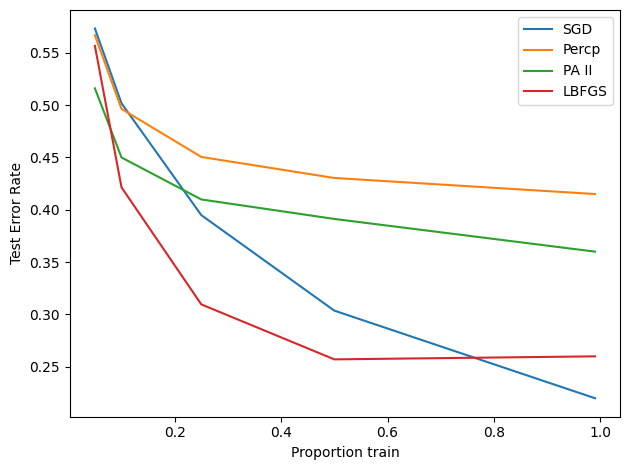

In [11]:
from sklearn.model_selection import train_test_split

heldout = [0.95, 0.90, 0.75, 0.50, 0.01]
rounds = 10
xx = 1.0 - np.array(heldout)

for name, clf in classifiers:
    print("Training %s" % name)
    yy = []
    for i in heldout:
        yy_ = []
        for r in range(rounds):
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=i
            )
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            yy_.append(1 - np.mean(y_pred == y_test))
        yy.append(np.mean(yy_))
    plt.plot(xx, yy, label=name)

plt.legend(loc="upper right")
plt.xlabel("Proportion train")
plt.ylabel("Test Error Rate")
save_fig('diff_model')
plt.show()
